In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [6]:
df.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

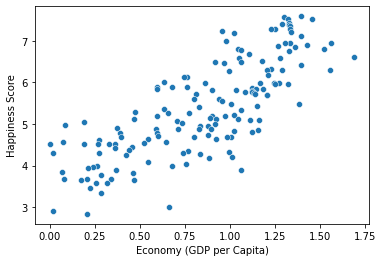

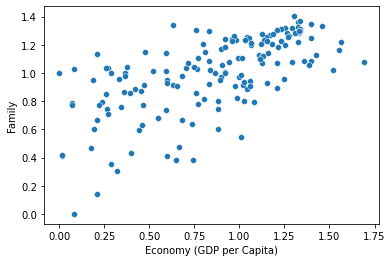

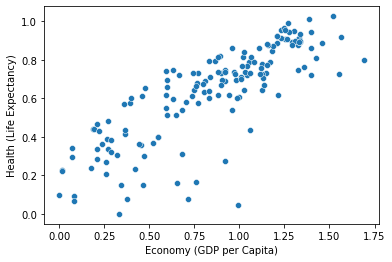

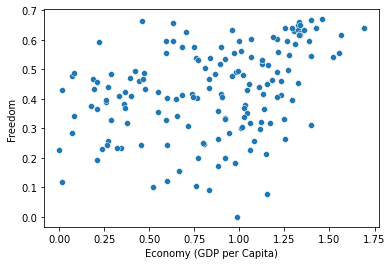

In [8]:
sns.scatterplot(x=df['Economy (GDP per Capita)'], y=df['Happiness Score'])
plt.show()

sns.scatterplot(x=df['Economy (GDP per Capita)'], y=df['Family'])
plt.show()

sns.scatterplot(x=df['Economy (GDP per Capita)'], y=df['Health (Life Expectancy)'])
plt.show()

sns.scatterplot(x=df['Economy (GDP per Capita)'], y=df['Freedom'])
plt.show()

In [9]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Since Happiness rank is dependent on Happiness scores (descending data) we can ignore this column while modelling

In [10]:
df.drop(['Happiness Rank'], axis=1, inplace=True)

In [11]:
df.corr()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,0.083380,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.118085,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


<AxesSubplot:>

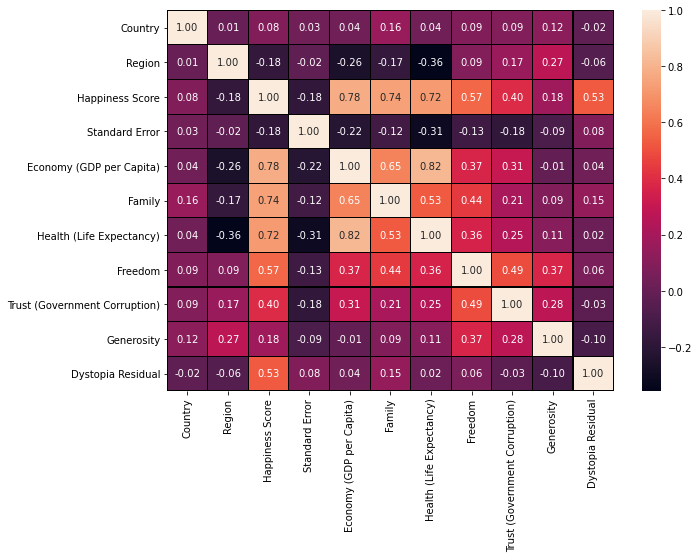

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')

Happiness score  has strong positive correlation with Economy, Family, Health standard error and country has negative correlation

Country                             AxesSubplot(0.125,0.536818;0.110714x0.343182)
Region                           AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Health (Life Expectancy)               AxesSubplot(0.125,0.125;0.110714x0.343182)
Freedom                             AxesSubplot(0.257857,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.390714,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.523571,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

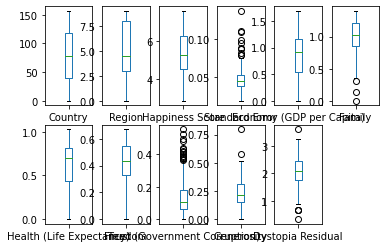

In [117]:
df.plot(kind='box',subplots=True,layout=(2,6))

In [23]:
print(df.shape)

from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print(df_new.shape)

(158, 11)
(149, 11)


In [119]:
# % data_loss: 
float((158-149)/158)*100

5.69620253164557

In [24]:
df_new.skew()

Country                          0.048701
Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [121]:
df_new.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [25]:
x = df_new.drop(['Happiness Score'], axis=1)
y = df_new.iloc[:,2]

In [28]:
#for removing skewness
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [29]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_y_train = lr.predict(x_train)
    pred_y_test = lr.predict(x_test)
    
    print(f"At random state {i}, Training accuracy = {r2_score(y_train, pred_y_train)}" )
    print(f"At random state {i}, Testing accuracy = {r2_score(y_test, pred_y_test)}" )
    print('\n')

At random state 0, Training accuracy = 0.9953698340788788
At random state 0, Testing accuracy = 0.995708920113266


At random state 1, Training accuracy = 0.9951199802100567
At random state 1, Testing accuracy = 0.997039265482801


At random state 2, Training accuracy = 0.9957790649189271
At random state 2, Testing accuracy = 0.9937829914439732


At random state 3, Training accuracy = 0.9956313407464262
At random state 3, Testing accuracy = 0.9941010250700082


At random state 4, Training accuracy = 0.995154289151242
At random state 4, Testing accuracy = 0.9955380038829672


At random state 5, Training accuracy = 0.9958627612883463
At random state 5, Testing accuracy = 0.992609074251948


At random state 6, Training accuracy = 0.9965127506306962
At random state 6, Testing accuracy = 0.9898300552880306


At random state 7, Training accuracy = 0.9962461951842538
At random state 7, Testing accuracy = 0.988557640473139


At random state 8, Training accuracy = 0.9955234874934071
At random s

At random state 100, Training accuracy = 0.9962357565315267
At random state 100, Testing accuracy = 0.9917753098881672


At random state 101, Training accuracy = 0.9958297463955831
At random state 101, Testing accuracy = 0.992195122534148


At random state 102, Training accuracy = 0.9956612193869456
At random state 102, Testing accuracy = 0.9942694706781711


At random state 103, Training accuracy = 0.9960072432914266
At random state 103, Testing accuracy = 0.9925742117917822


At random state 104, Training accuracy = 0.9954341861745301
At random state 104, Testing accuracy = 0.9950883784024258


At random state 105, Training accuracy = 0.9953914853693188
At random state 105, Testing accuracy = 0.9950759331620083


At random state 106, Training accuracy = 0.9959538832739305
At random state 106, Testing accuracy = 0.9914847517933914


At random state 107, Training accuracy = 0.9955705022948735
At random state 107, Testing accuracy = 0.9945689757699685


At random state 108, Training acc

At random state 209, Training accuracy = 0.9957760819594204
At random state 209, Testing accuracy = 0.9926816636654971


At random state 210, Training accuracy = 0.995390482971673
At random state 210, Testing accuracy = 0.9945179445584769


At random state 211, Training accuracy = 0.995325056047382
At random state 211, Testing accuracy = 0.9958414410823817


At random state 212, Training accuracy = 0.9956286480947479
At random state 212, Testing accuracy = 0.9938997565928873


At random state 213, Training accuracy = 0.995836766637051
At random state 213, Testing accuracy = 0.9936324370360989


At random state 214, Training accuracy = 0.9955583477433227
At random state 214, Testing accuracy = 0.994545476404213


At random state 215, Training accuracy = 0.9955630302832431
At random state 215, Testing accuracy = 0.9938019501609883


At random state 216, Training accuracy = 0.9952281732362568
At random state 216, Testing accuracy = 0.9959816517127176


At random state 217, Training accura

At random state 305, Training accuracy = 0.9954350877173335
At random state 305, Testing accuracy = 0.994792709622183


At random state 306, Training accuracy = 0.9954611964364017
At random state 306, Testing accuracy = 0.9950961018531744


At random state 307, Training accuracy = 0.9958274009192356
At random state 307, Testing accuracy = 0.9925598881560163


At random state 308, Training accuracy = 0.9955476898743729
At random state 308, Testing accuracy = 0.994649918231514


At random state 309, Training accuracy = 0.9954357208542565
At random state 309, Testing accuracy = 0.9945025574318275


At random state 310, Training accuracy = 0.9947479706378728
At random state 310, Testing accuracy = 0.9975017587269948


At random state 311, Training accuracy = 0.9963599753558364
At random state 311, Testing accuracy = 0.9907458010887061


At random state 312, Training accuracy = 0.9956595874125932
At random state 312, Testing accuracy = 0.9940364750819388


At random state 313, Training accu

At random state 387, Training accuracy = 0.9949920411891754
At random state 387, Testing accuracy = 0.9965554536654944


At random state 388, Training accuracy = 0.9955993033301036
At random state 388, Testing accuracy = 0.9938245306502722


At random state 389, Training accuracy = 0.9956724237949348
At random state 389, Testing accuracy = 0.9916503278660933


At random state 390, Training accuracy = 0.9953287125267839
At random state 390, Testing accuracy = 0.9956392022291438


At random state 391, Training accuracy = 0.9954871851891005
At random state 391, Testing accuracy = 0.9944803435493828


At random state 392, Training accuracy = 0.9950047548445737
At random state 392, Testing accuracy = 0.9966843899098601


At random state 393, Training accuracy = 0.9948594818073534
At random state 393, Testing accuracy = 0.9971796454351388


At random state 394, Training accuracy = 0.9952736823740858
At random state 394, Testing accuracy = 0.9953506544687568


At random state 395, Training ac

At random state 469, Training accuracy = 0.9965150170060769
At random state 469, Testing accuracy = 0.9888191201858978


At random state 470, Training accuracy = 0.9952981252119
At random state 470, Testing accuracy = 0.9956456543801948


At random state 471, Training accuracy = 0.9955111875551748
At random state 471, Testing accuracy = 0.9946875386099976


At random state 472, Training accuracy = 0.9958329816069491
At random state 472, Testing accuracy = 0.9931380344228707


At random state 473, Training accuracy = 0.9960909316463895
At random state 473, Testing accuracy = 0.991235178915873


At random state 474, Training accuracy = 0.9963931195882755
At random state 474, Testing accuracy = 0.9916086140385535


At random state 475, Training accuracy = 0.9956639710415267
At random state 475, Testing accuracy = 0.9923522743058573


At random state 476, Training accuracy = 0.9956048783829481
At random state 476, Testing accuracy = 0.9945108935228949


At random state 477, Training accura

At random state 578, Training accuracy = 0.9957056823697946
At random state 578, Testing accuracy = 0.9935901575138837


At random state 579, Training accuracy = 0.9952204966628369
At random state 579, Testing accuracy = 0.9957805935664956


At random state 580, Training accuracy = 0.9956175682662973
At random state 580, Testing accuracy = 0.994242479642601


At random state 581, Training accuracy = 0.9954055876020279
At random state 581, Testing accuracy = 0.9951294492043373


At random state 582, Training accuracy = 0.9957301362725777
At random state 582, Testing accuracy = 0.9933395557514164


At random state 583, Training accuracy = 0.9954297361089253
At random state 583, Testing accuracy = 0.9951237523072407


At random state 584, Training accuracy = 0.9955970685842701
At random state 584, Testing accuracy = 0.9938490701424648


At random state 585, Training accuracy = 0.9951121973493317
At random state 585, Testing accuracy = 0.9962780310908294


At random state 586, Training acc

At random state 684, Training accuracy = 0.9954385208474896
At random state 684, Testing accuracy = 0.9942962250784328


At random state 685, Training accuracy = 0.9952456223033939
At random state 685, Testing accuracy = 0.9953557600980282


At random state 686, Training accuracy = 0.995074691490452
At random state 686, Testing accuracy = 0.9961881341880463


At random state 687, Training accuracy = 0.9959724319555706
At random state 687, Testing accuracy = 0.9897182103285126


At random state 688, Training accuracy = 0.9949128278104653
At random state 688, Testing accuracy = 0.996636389669457


At random state 689, Training accuracy = 0.9952342015945389
At random state 689, Testing accuracy = 0.9959249064713341


At random state 690, Training accuracy = 0.9951140063425373
At random state 690, Testing accuracy = 0.9965692967088042


At random state 691, Training accuracy = 0.9954151849082357
At random state 691, Testing accuracy = 0.9952272143391921


At random state 692, Training accu

At random state 791, Training accuracy = 0.9950849423985698
At random state 791, Testing accuracy = 0.9964751785824564


At random state 792, Training accuracy = 0.995387345586065
At random state 792, Testing accuracy = 0.9953652944221115


At random state 793, Training accuracy = 0.9959563377907406
At random state 793, Testing accuracy = 0.9907176547502431


At random state 794, Training accuracy = 0.9958085983342031
At random state 794, Testing accuracy = 0.9916395489411249


At random state 795, Training accuracy = 0.9957035473619443
At random state 795, Testing accuracy = 0.9940039125202739


At random state 796, Training accuracy = 0.9950873231709169
At random state 796, Testing accuracy = 0.996486347883071


At random state 797, Training accuracy = 0.9958778536244087
At random state 797, Testing accuracy = 0.9917269482331629


At random state 798, Training accuracy = 0.9958360500044307
At random state 798, Testing accuracy = 0.9928693414583489


At random state 799, Training accu

At random state 884, Training accuracy = 0.996226402490248
At random state 884, Testing accuracy = 0.9921733674202883


At random state 885, Training accuracy = 0.9956871389600476
At random state 885, Testing accuracy = 0.9934690868873873


At random state 886, Training accuracy = 0.9951158088576043
At random state 886, Testing accuracy = 0.9963705842948747


At random state 887, Training accuracy = 0.9967624058173599
At random state 887, Testing accuracy = 0.9898766580511751


At random state 888, Training accuracy = 0.9953708492028523
At random state 888, Testing accuracy = 0.9954781673991278


At random state 889, Training accuracy = 0.9954844331763276
At random state 889, Testing accuracy = 0.9945999177688927


At random state 890, Training accuracy = 0.9959338358109362
At random state 890, Testing accuracy = 0.9930008290983917


At random state 891, Training accuracy = 0.9953051854075193
At random state 891, Testing accuracy = 0.9958589403152632


At random state 892, Training acc

At random state 964, Training accuracy = 0.996074166390574
At random state 964, Testing accuracy = 0.9923114014369028


At random state 965, Training accuracy = 0.9957128615594906
At random state 965, Testing accuracy = 0.9936738012710779


At random state 966, Training accuracy = 0.9954257431996043
At random state 966, Testing accuracy = 0.9945708993424149


At random state 967, Training accuracy = 0.9951958183482259
At random state 967, Testing accuracy = 0.9963458682803615


At random state 968, Training accuracy = 0.9952616091153109
At random state 968, Testing accuracy = 0.9956158564253281


At random state 969, Training accuracy = 0.9963505611283278
At random state 969, Testing accuracy = 0.9898573843161127


At random state 970, Training accuracy = 0.9951758985265585
At random state 970, Testing accuracy = 0.9961716587193706


At random state 971, Training accuracy = 0.9953914735167841
At random state 971, Testing accuracy = 0.9950983766808429


At random state 972, Training acc

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=12)
lr.fit(x_train,y_train)
pred_y_train = lr.predict(x_train)
pred_y_test = lr.predict(x_test)
    
print(f"At random state 12, Training accuracy = {r2_score(y_train, pred_y_train)}" )
print(f"At random state 12, Testing accuracy = {r2_score(y_test, pred_y_test)}" )

At random state 12, Training accuracy = 0.9953175384617126
At random state 12, Testing accuracy = 0.9952870378667243


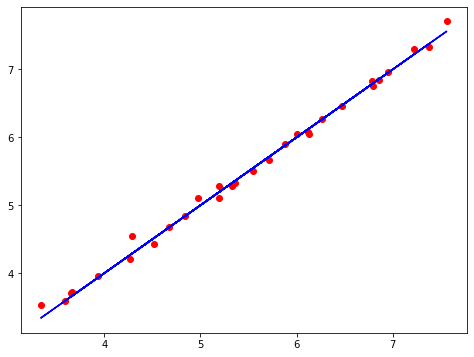

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_y_test, color='r')
plt.plot(y_test, y_test, color='b')

In [32]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv = j)
    cv_mean = cv_score.mean()
    print(f'At cross fold {j} cv score is {cv_mean}\n')  

At cross fold 2 cv score is 0.8807939369966877

At cross fold 3 cv score is 0.9140115450360123

At cross fold 4 cv score is 0.8672500089264755

At cross fold 5 cv score is 0.8572275198277441

At cross fold 6 cv score is 0.7972569132473706

At cross fold 7 cv score is 0.6737121662707202

At cross fold 8 cv score is 0.657896076312136

At cross fold 9 cv score is 0.5750209870361949



Select cv = 3 as cv score is near to the accuracy score of the Linear regression model

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [34]:
ls = Lasso(alpha=0.001, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

pred_ls = ls.predict(x_test)

lss = r2_score(y_test, pred_ls)
lss

0.9952915312698036

In [35]:
import pickle
filename='happiness.pkl'
pickle.dump(ls,open(filename,'wb'))